In [ ]:
!unzip testing_data.zip

Archive:  testing_data.zip
   creating: testing_data/Akshay/
  inflating: testing_data/Akshay/IMG_20200702_081400.jpg  
  inflating: testing_data/Akshay/IMG_20200702_081847.jpg  
  inflating: testing_data/Akshay/IMG_20200702_081904.jpg  
  inflating: testing_data/Akshay/IMG_20200702_082446.jpg  
  inflating: testing_data/Akshay/IMG_20200702_082503.jpg  
   creating: testing_data/Arpit/
  inflating: testing_data/Arpit/323.png  
  inflating: testing_data/Arpit/9.png  
  inflating: testing_data/Arpit/WIN_20200519_02_04_15_Pro.png  
  inflating: testing_data/Arpit/WIN_20200519_02_04_35_Pro.png  
  inflating: testing_data/Arpit/WIN_20200519_02_04_44_Pro.png  
   creating: testing_data/Pratishtha/
  inflating: testing_data/Pratishtha/photo40.jpg  
  inflating: testing_data/Pratishtha/photo58.jpg  
  inflating: testing_data/Pratishtha/photo77.jpg  
  inflating: testing_data/Pratishtha/photo86.jpg  
  inflating: testing_data/Pratishtha/photo87.jpg  
   creating: testing_data/Rahul/
  inflating

In [2]:
!unzip training_data.zip

Archive:  training_data.zip
   creating: training_data/Akshay/
  inflating: training_data/Akshay/IMG_20200702_081019.jpg  
  inflating: training_data/Akshay/IMG_20200702_081052.jpg  
  inflating: training_data/Akshay/IMG_20200702_081104.jpg  
  inflating: training_data/Akshay/IMG_20200702_081119.jpg  
  inflating: training_data/Akshay/IMG_20200702_081140.jpg  
  inflating: training_data/Akshay/IMG_20200702_081158.jpg  
  inflating: training_data/Akshay/IMG_20200702_081226.jpg  
  inflating: training_data/Akshay/IMG_20200702_081317.jpg  
  inflating: training_data/Akshay/IMG_20200702_081331.jpg  
  inflating: training_data/Akshay/IMG_20200702_081347.jpg  
  inflating: training_data/Akshay/IMG_20200702_081428.jpg  
  inflating: training_data/Akshay/IMG_20200702_081607.jpg  
  inflating: training_data/Akshay/IMG_20200702_081650.jpg  
  inflating: training_data/Akshay/IMG_20200702_081716.jpg  
  inflating: training_data/Akshay/IMG_20200702_081731.jpg  
  inflating: training_data/Akshay/IMG

In [3]:
!pwd

/content


In [20]:
from keras.applications import MobileNet

In [21]:
img_rows, img_cols = 224, 224 

In [22]:
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [23]:
for layer in MobileNet.layers:
    layer.trainable = False

In [24]:
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 DepthwiseConv2D False
45 BatchNormalization False
46 ReLU False
47 Conv2D False
48 Batc

In [25]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

# Set our class number to 5 (Akshay , Arpit , Pratishtha , Rahul , Reetesh)
num_classes = 5

FC_Head = lw(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_data_dir ='/content/training_data'

In [29]:
validation_data_dir ='/content/testing_data'

In [30]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [31]:
validation_datagen = ImageDataGenerator(rescale=1./255)
 

In [32]:
batch_size = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 200 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [33]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [65]:
checkpoint = ModelCheckpoint("face_mobileNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True)


In [66]:
callbacks = [earlystop, checkpoint]

In [67]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [68]:
nb_train_samples = 200
nb_validation_samples = 25

In [69]:
epochs = 30
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/30
12/12 [==============================] - 14s 1s/step - loss: 1.7579 - accuracy: 0.8478 - val_loss: 0.8447 - val_accuracy: 0.8125

Epoch 00001: val_loss improved from inf to 0.84465, saving model to face_mobileNet.h5
Epoch 2/30
12/12 [==============================] - 13s 1s/step - loss: 0.0553 - accuracy: 0.9674 - val_loss: 0.9548 - val_accuracy: 0.7778

Epoch 00002: val_loss did not improve from 0.84465
Epoch 3/30
12/12 [==============================] - 13s 1s/step - loss: 0.2779 - accuracy: 0.9293 - val_loss: 2.2785 - val_accuracy: 0.4375

Epoch 00003: val_loss did not improve from 0.84465
Epoch 4/30
12/12 [==============================] - 13s 1s/step - loss: 0.2071 - accuracy: 0.9219 - val_loss: 2.8548 - val_accuracy: 0.4444

Epoch 00004: val_loss did not improve from 0.84465
Epoch 5/30
12/12 [==============================] - 13s 1s/step - loss: 0.2000 - accuracy: 0.9432 - val_loss: 0.9292 - val_accuracy: 0.7500

Epoch 00005: val_loss did not improve from 0.84465
Epoch

In [70]:
from keras.models import load_model

classifier = load_model('face_mobileNet.h5')

Class - Akshay 


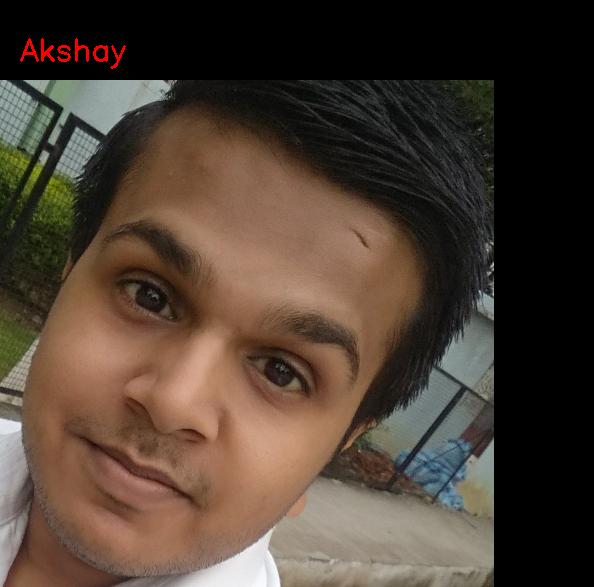

Class - Akshay 


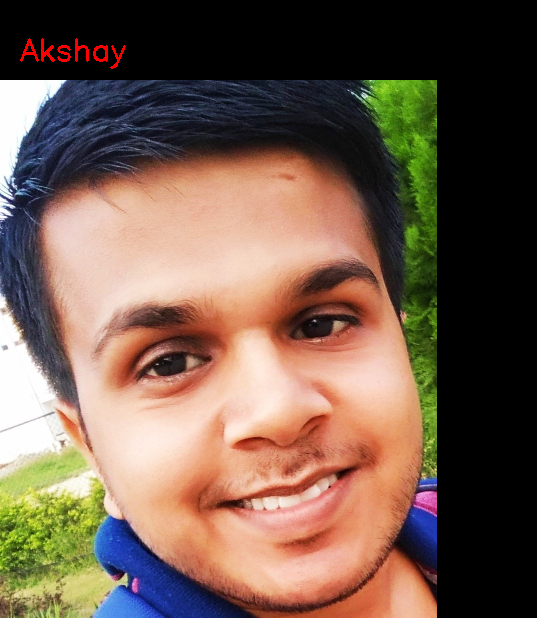

Class - Rahul


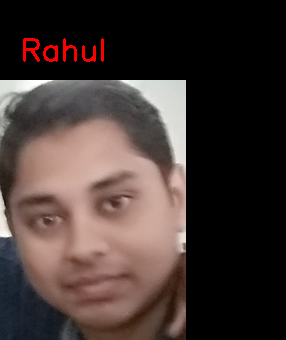

Class - Arpit


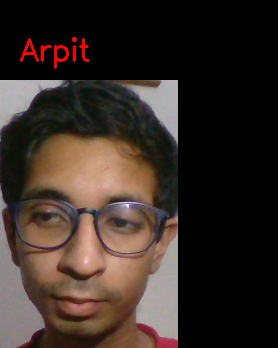

Class - Akshay 


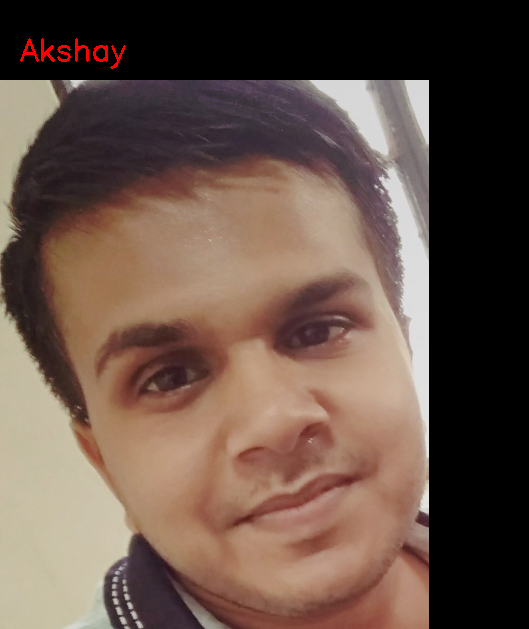

Class - Akshay 


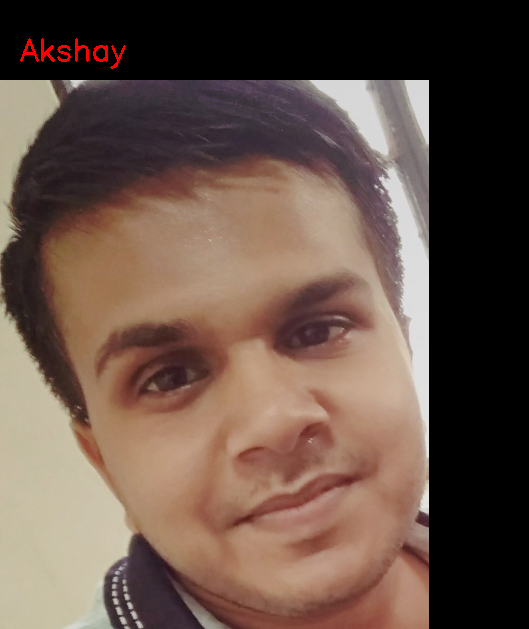

Class - Akshay 


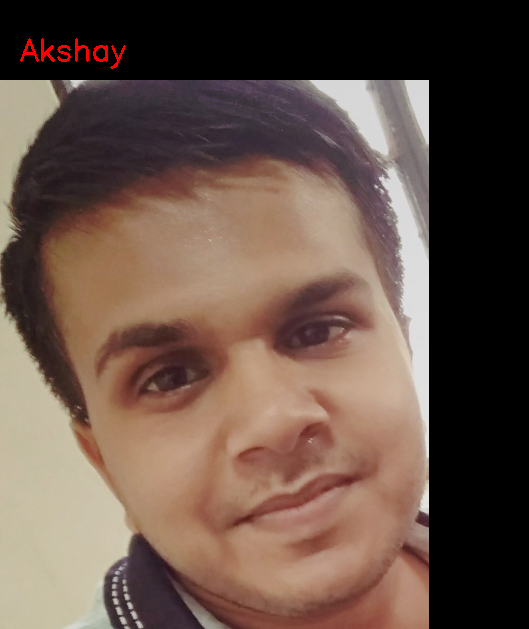

Class - Rahul


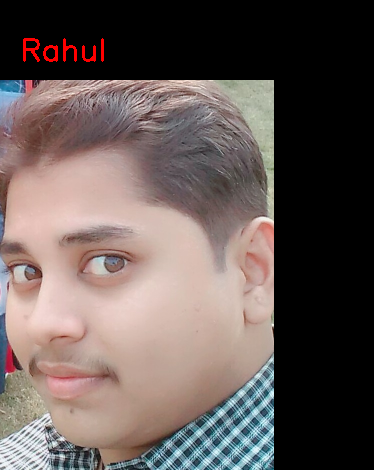

Class - Akshay 


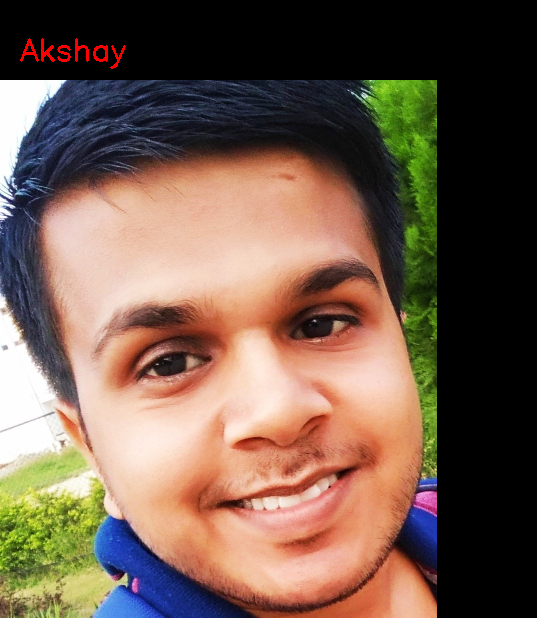

Class - Arpit


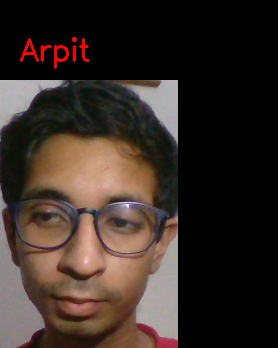

In [72]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow


face_dict = {"[0]": "Akshay ", 
                      "[1]": "Arpit",
                      "[2]": "Pratishtha",
                      "[3]": "Rahul",
                      "[4]": "Reetesh"}

face_dict_n = {"Akshay": "Akshay ", 
                      "Arpit": "Arpit",
                      "Pratishtha": "Pratishtha",
                      "Rahul": "Rahul",
                      "Reetesh": "Reetesh"}

def draw_test(name, pred, im):
    FACE = face_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, FACE, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + face_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name) 
       
for i in range(0,10):
    input_im = getRandomImage("/content/testing_data/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

